# Galton-Brett
Simulation eines Galton-Bretts mit Zufallszahlen ("Monte-Carlo-Methode")

Für jeden Streukörper gilt: die Kugel geht mit je 50% Wahrscheinlichkeit nach links/rechts. Nach $n$ Lagen von Streukörpern ergibt sich damit eine Häufigkeitsverteilung, die näherungsweise einer Normalverteilung (auch: Gaußverteilung) entspricht.


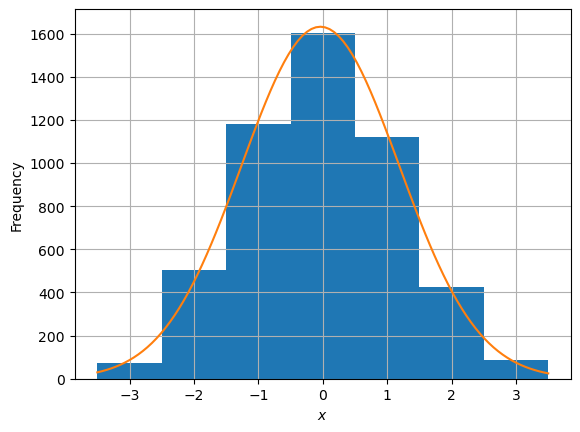

In [1]:
"""Short Python script to simulate a Galton board"""
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# number of balls
nballs = 5000

# number of layers
nlayers = 6
shift = nlayers/2

# Draw nballs times nlayers random numbers (each with 50% probability for 0 or 1)
rng = np.random.default_rng( 12345 )
random_numbers = rng.integers( 2, size = ( nballs, nlayers ) )

# sum of random number for each ball corresponds to position ("bin") on Galton board
sum = random_numbers.sum( axis = 1 )

# shift sum by -nlayers/2 -> make distribution symmetrical around 0
sum = sum - shift

# plot
fig,ax = plt.subplots()

# histogram
bin_boundaries = np.arange( -shift - 0.5, shift + 1.5 )
ax.hist( sum, bins=bin_boundaries )

# comparison with normal distribution
mean, standard_deviation = stats.norm.fit( sum )
x = np.linspace( -shift - 0.5, shift + 0.5, 100 )
y = nballs * stats.norm.pdf( x, mean, standard_deviation )
ax.plot( x, y )

# add axis labels and grid
ax.set_xlabel( r'$x$' )
ax.set_ylabel( r'Frequency' )
ax.grid( True )

# save and show figure
plt.savefig( 'galton.pdf' )
plt.show()